<a href="https://colab.research.google.com/github/Mrcl3/kLfCelvFM1n2urrn/blob/main/2DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D CNN


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Rescaling, BatchNormalization, Conv3D, MaxPool3D, Dropout
from sklearn.metrics import f1_score
import tensorflow.keras as keras


## Declaring the repositories with images

In [ ]:
# Assuming your image folder is called 'dataset' and contains two subfolders: 'flipped' and 'noflipped'
flipped_dir = '/content/drive/MyDrive/MonReader/images (1)/images/training/flip'
noflipped_dir = '/content/drive/MyDrive/MonReader/images (1)/images/training/notflip'
test_dir = '/content/drive/MyDrive/MonReader/images (1)/images/testing/'

## Loading the images for training

In [ ]:
# Load the image paths from the 'flipped' and 'noflipped' subfolders
flipped_images = glob.glob(flipped_dir + '/*.jpg')  # Assuming your images have the .jpg extension
noflipped_images = glob.glob(noflipped_dir + '/*.jpg')

# Assuming you have your labels as 'flipped' and 'noflipped'
flipped_labels = ['flip'] * len(flipped_images)
noflipped_labels = ['noflip'] * len(noflipped_images)

# Concatenate the flipped and noflipped images and labels
images = flipped_images + noflipped_images
labels = flipped_labels + noflipped_labels


## Organizing train and test data

In [ ]:
# Split the dataset into training, validation, and test sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load the test images and labels
test_flipped_images = glob.glob(test_dir + '/flip/*.jpg')
test_noflipped_images = glob.glob(test_dir + '/notflip/*.jpg')

test_images = test_flipped_images + test_noflipped_images
test_labels = ['flip'] * len(test_flipped_images) + ['noflip'] * len(test_noflipped_images)

## Data preprocessing

In [ ]:
input_shape = (32, 32, 3)

# Convert labels to binary representation (0 for flipped, 1 for noflipped)
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)
test_labels = label_encoder.transform(test_labels)

# Preprocess function
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, input_shape[:2])
    image = image / 255.0  # Normalize pixel values
    return image

# Load and preprocess the training, validation, and test images
train_images = np.array([preprocess_image(image_path) for image_path in train_images])
val_images = np.array([preprocess_image(image_path) for image_path in val_images])
test_images = np.array([preprocess_image(image_path) for image_path in test_images])

## ImageDataGenerator

In [ ]:
batch_size = 128
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    #horizontal_flip=True
)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=batch_size)

## Model definition

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output neuron for binary classification
])

## Model summary

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 2, 2, 128)      

## Model compilation

In [ ]:
# Model Compilation
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

#Model Training
epochs = 80
model.fit(train_generator, epochs=epochs, validation_data=(val_images, val_labels))

# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)

Epoch 1/80
15/15 [==============================] - 8s 468ms/step - loss: 0.6957 - binary_accuracy: 0.4835 - val_loss: 0.6917 - val_binary_accuracy: 0.5240
Epoch 2/80
15/15 [==============================] - 4s 240ms/step - loss: 0.6929 - binary_accuracy: 0.5044 - val_loss: 0.6907 - val_binary_accuracy: 0.5240
Epoch 3/80
15/15 [==============================] - 4s 285ms/step - loss: 0.6926 - binary_accuracy: 0.5039 - val_loss: 0.6909 - val_binary_accuracy: 0.5240
Epoch 4/80
15/15 [==============================] - 6s 419ms/step - loss: 0.6927 - binary_accuracy: 0.5081 - val_loss: 0.6909 - val_binary_accuracy: 0.5240
Epoch 5/80
15/15 [==============================] - 4s 241ms/step - loss: 0.6919 - binary_accuracy: 0.5196 - val_loss: 0.6907 - val_binary_accuracy: 0.5240
Epoch 6/80
15/15 [==============================] - 4s 237ms/step - loss: 0.6930 - binary_accuracy: 0.5050 - val_loss: 0.6905 - val_binary_accuracy: 0.5240
Epoch 7/80
15/15 [==============================] - 5s 324ms/ste

## Make predictions on the test images

In [ ]:
test_predictions = model.predict(test_images)
test_predictions = (test_predictions > 0.5).astype(int).flatten()


19/19 [==============================] - 1s 26ms/step


## Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       290
           1       0.94      1.00      0.97       307

    accuracy                           0.96       597
   macro avg       0.97      0.96      0.96       597
weighted avg       0.97      0.96      0.96       597



## Confusion matrix

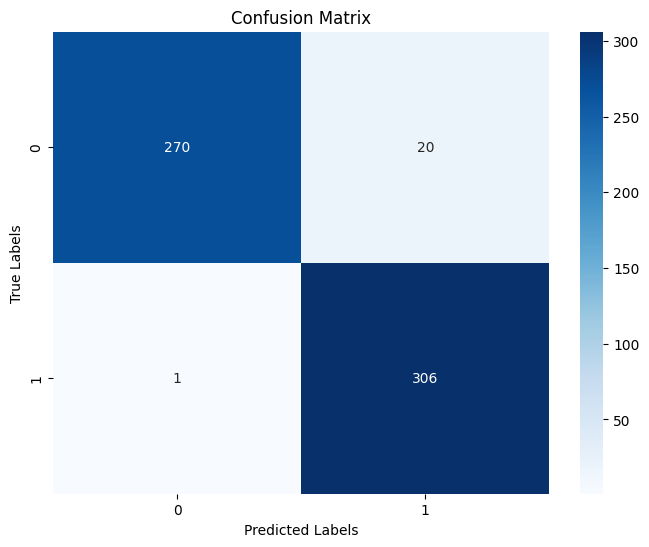

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
confusion_mat = confusion_matrix(test_labels, test_predictions)

# Create a heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Vision Transformers

In [ ]:
!pip install patchify

In [ ]:
from patchify import patchify
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
import os
from glob import glob
import numpy as np

## Hyperparemeters

In [ ]:
hp = {}
hp['image_size'] = 200
hp['num_channels'] = 3
hp['patch_size'] = 25
hp['num_patches'] = (hp['image_size']**2) // (hp['patch_size']**2)
hp['flat_patches_shape'] = (hp['num_patches'], hp['patch_size']*hp['patch_size']*hp['num_channels'])

hp['batch_size'] = 32
hp['lr'] = 1e-4
hp['num_epochs'] = 50
hp['num_classes'] = 2
hp['class_names'] = ['flip', 'notflip']

hp["num_layers"] = 12
hp["hidden_dim"] = 768
hp["mlp_dim"] = 3072
hp["num_heads"] = 12
hp["dropout_rate"] = 0.1


In [ ]:
def create_dir(path):
  if not os.path.exists(path):
    os.makedirs(path)

In [ ]:
def load_data(path, split=0.2):
    images = shuffle(glob(os.path.join(path, "*", "*.jpg")))
    split_size = int(len(images) * split)
    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_x, test_x = train_test_split(train_x, test_size=split_size, random_state=42)
    return train_x, valid_x, test_x



In [ ]:
def load_test_data(path):
    images = shuffle(glob(os.path.join(path, "*", "*.jpg")))
    test_x2 = images
    return test_x2



In [ ]:
from tensorflow.python.ops.stateless_random_ops import split
def process_image_label(path):
  path = path.decode()
  """ reading images """
  image = cv2.imread(path, cv2.IMREAD_COLOR)
  image = cv2.resize(image, (hp['image_size'], hp['image_size']))
  #image = image/255.0
  #print(image.shape)
  """ Preprocessing to patches"""
  patch_shape = (hp['patch_size'], hp['patch_size'], hp['num_channels'])
  patches = patchify(image, patch_shape, hp['patch_size'])
  patches = np.reshape(patches, (64,25,25,3))
  """ Printing the patches"""
  """
  for i in range(64):
    cv2.imwrite(f"/content/drive/MyDrive/MonReader/files/{i}.png", patches[i])
  print(patches.shape)
  """
  patches = np.reshape(patches, hp['flat_patches_shape'])
  patches = patches.astype(np.float32)


  """ Label """
  class_name = path.split('/')[-2]
  #print(class_name)
  class_idx = hp['class_names'].index(class_name)
  class_idx = np.array(class_idx, dtype=np.int32)
  #print(class_idx)

  return patches, class_idx


In [ ]:
def parse(path):
  patches, labels = tf.numpy_function(process_image_label, [path], [tf.float32, tf.int32])
  labels = tf.one_hot(labels, hp['num_classes'])

  patches.set_shape(hp['flat_patches_shape'])
  labels.set_shape(hp['num_classes'])

  return patches, labels

def tf_dataset(images, batch=32):
    ds = tf.data.Dataset.from_tensor_slices((images))
    ds = ds.map(parse).batch(batch).prefetch(8)
    return ds

In [ ]:
def tf_dataset(images, batch=32):
  ds = tf.data.Dataset.from_tensor_slices((images))
  ds = ds.map(parse).batch(batch).prefetch(8)
  return ds

In [ ]:
if __name__ == "__main__":
  """Seeding"""
  np.random.seed(42)
  tf.random.set_seed(42)

  create_dir("/content/drive/MyDrive/MonReader/files")
  dataset_path = "/content/drive/MyDrive/MonReader/images (1)/images/training"
  model_path = os.path.join("files", "model.h5")
  csv_path = os.path.join("files", "log.csv")
  """ Dataset training """
  train_x, valid_x, test_x = load_data(dataset_path)

  train_ds = tf_dataset(train_x, batch=hp['batch_size'])
  valid_ds = tf_dataset(valid_x, batch=hp['batch_size'])
  test_x = load_test_data('/content/drive/MyDrive/MonReader/images (1)/images/testing')
  test_ds = tf_dataset(test_x, batch=hp['batch_size'])



AttributeError: ignored

## Model

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


In [ ]:
class ClassToken(Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value = w_init(shape=(1, 1, input_shape[-1]), dtype=tf.float32),
            trainable = True
        )

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        hidden_dim = self.w.shape[-1]

        cls = tf.broadcast_to(self.w, [batch_size, 1, hidden_dim])
        cls = tf.cast(cls, dtype=inputs.dtype)
        return cls

def mlp(x, cf):
    x = Dense(cf["mlp_dim"], activation="gelu")(x)
    x = Dropout(cf["dropout_rate"])(x)
    x = Dense(cf["hidden_dim"])(x)
    x = Dropout(cf["dropout_rate"])(x)
    return x

def transformer_encoder(x, cf):
    skip_1 = x
    x = LayerNormalization()(x)
    x = MultiHeadAttention(
        num_heads=cf["num_heads"], key_dim=cf["hidden_dim"]
    )(x, x)
    x = Add()([x, skip_1])

    skip_2 = x
    x = LayerNormalization()(x)
    x = mlp(x, cf)
    x = Add()([x, skip_2])

    return x

In [ ]:
def ViT(cf):
    """ Inputs """
    input_shape = (cf["num_patches"], cf["patch_size"]*cf["patch_size"]*cf["num_channels"])
    inputs = Input(input_shape)     ## (None, 256, 3072)

    """ Patch + Position Embeddings """
    patch_embed = Dense(cf["hidden_dim"])(inputs)   ## (None, 256, 768)

    positions = tf.range(start=0, limit=cf["num_patches"], delta=1)
    pos_embed = Embedding(input_dim=cf["num_patches"], output_dim=cf["hidden_dim"])(positions) ## (256, 768)
    embed = patch_embed + pos_embed ## (None, 256, 768)

    """ Adding Class Token """
    token = ClassToken()(embed)
    x = Concatenate(axis=1)([token, embed]) ## (None, 257, 768)

    for _ in range(cf["num_layers"]):
        x = transformer_encoder(x, cf)

    """ Classification Head """
    x = LayerNormalization()(x)     ## (None, 257, 768)
    x = x[:, 0, :]
    x = Dense(cf["num_classes"], activation="softmax")(x)

    model = Model(inputs, x)
    return model

In [ ]:
if __name__ == "__main__":
    config = {}
    config["num_layers"] = 12
    config["hidden_dim"] = 768
    config["mlp_dim"] = 3072
    config["num_heads"] = 12
    config["dropout_rate"] = 0.1
    config["num_patches"] = 256
    config["patch_size"] = 32
    config["num_channels"] = 3
    config["num_classes"] = 5

    model = ViT(config)
    model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 3072)]  0           []                               
                                                                                                  
 dense (Dense)                  (None, 256, 768)     2360064     ['input_1[0][0]']                
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 256, 768)    0           ['dense[0][0]']                  
 da)                                                                                              
                                                                                                  
 class_token (ClassToken)       (None, 1, 768)       768         ['tf.__operators__.add[0][0]'

In [ ]:
model = ViT(hp)
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(hp['lr'], clipvalue=1.0),
    metrics=['acc']
)

In [ ]:
    from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping

    callbacks = [
        ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-10, verbose=1),
        CSVLogger(csv_path),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False),
    ]

    model.fit(
        train_ds,
        epochs=hp["num_epochs"],
        validation_data=valid_ds,
        callbacks=callbacks
    )
    model.save('/content/drive/MyDrive/MonReader/files/my_model_entire')

Epoch 1/50
45/45 [==============================] - ETA: 0s - loss: 1.2330 - acc: 0.4868
Epoch 1: val_loss improved from inf to 0.82684, saving model to files/model.h5
45/45 [==============================] - 614s 12s/step - loss: 1.2330 - acc: 0.4868 - val_loss: 0.8268 - val_acc: 0.4393 - lr: 1.0000e-04
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 0.7270 - acc: 0.5104
Epoch 2: val_loss did not improve from 0.82684
45/45 [==============================] - 101s 2s/step - loss: 0.7270 - acc: 0.5104 - val_loss: 0.8893 - val_acc: 0.4393 - lr: 1.0000e-04
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.7244 - acc: 0.5251
Epoch 3: val_loss did not improve from 0.82684
45/45 [==============================] - 100s 2s/step - loss: 0.7244 - acc: 0.5251 - val_loss: 0.8675 - val_acc: 0.4393 - lr: 1.0000e-04
Epoch 4/50
45/45 [==============================] - ETA: 0s - loss: 0.7162 - acc: 0.5160
Epoch 4: val_loss did not improve from 0.82684
45/45 [=====

In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/MonReader/files/model.h5')

In [ ]:
model.save('/content/drive/MyDrive/MonReader/files/my_model')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/MonReader/files/model.h5')

In [ ]:
test_ds = tf_dataset(test_x, batch=hp['batch_size'])
model.evaluate(test_ds)

19/19 [==============================] - 163s 8s/step - loss: 0.3016 - acc: 0.8995


[0.3015839159488678, 0.8994975090026855]

In [ ]:
test_predictions = model.predict(test_ds)

19/19 [==============================] - 30s 1s/step


## Getting the predicted labels

In [ ]:
binary_labels = np.argmax(test_predictions, axis=1)
binary_labels



array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

## Getting the test labels

In [ ]:
label_list = []

for patches, labels in test_ds:
    label_list.extend(labels)

# Convert the labels based on the specified conditions
converted_labels = [0 if label[0] == 1 else 1 for label in label_list]

print(converted_labels)

[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 

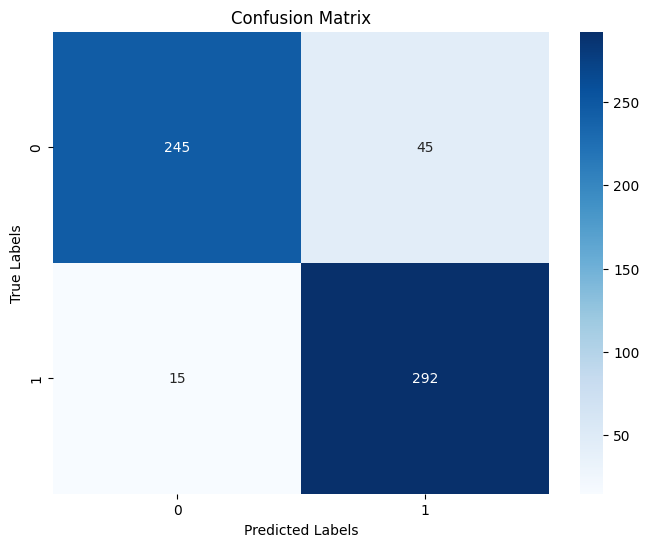

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
confusion_mat = confusion_matrix(converted_labels, binary_labels)

# Create a heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Vision Transformer summary

Training accuracy: 0.96

Loss: 0.0845

validation accuracy: 0.94

Validation loss: 0.16

Test accuracy: 0.9

Test loss: 0.3

## 2D CNN

Results for the test data:
          precision    recall  f1-score   support

           0       1.00      0.93      0.96       290
           1       0.94      1.00      0.97       307

    accuracy                           0.96       597
